### Data structures accepted by seaborn

![](https://seaborn.pydata.org/_images/data_structure_19_0.png)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
x = np.array([10,20,30,40])
y = np.array([5,2,3])

ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

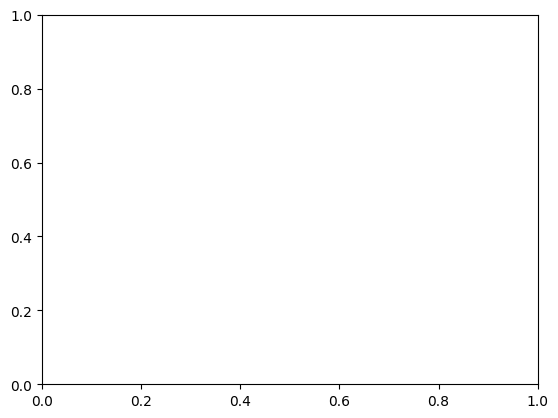

In [6]:
plt.plot(x,y)

#### Long-form vs. wide-form 

* Most plotting functions in seaborn are oriented towards vectors of data.
* When plotting `x` against `y`, each variable should be a vector.
* Seaborn accepts data sets that have more than one vector organized in some tabular fashion.
* There is a fundamental distinction between `long-form` and `wide-form` data tables, and seaborn will treat each differently.

In [8]:
df = pd.DataFrame([x,y])
df

,0,1,2,3
0,10,20,30,40.0
1,5,2,3,NaN


##### Long-form data
A long-form data table has the following characteristics:

* Each variable is a column
* Each observation is a row

In [11]:
flights  = pd.read_csv('Datasets/flights.csv')

In [12]:
flights.shape

(144, 3)

In [13]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


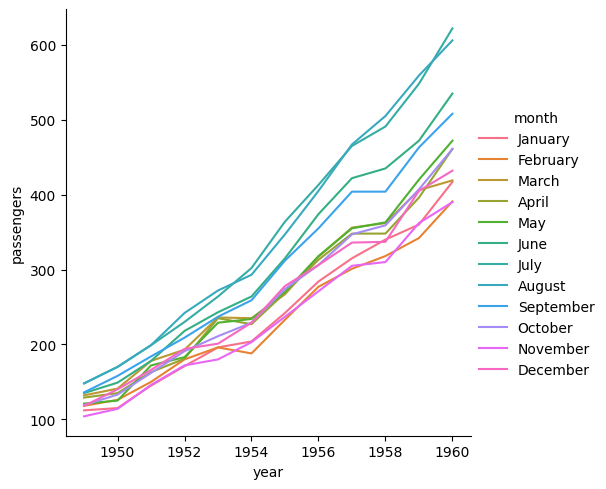

In [16]:
sns.relplot(data=flights,x='year',y='passengers',kind='line',hue='month')

##### Wide-form data

In [18]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


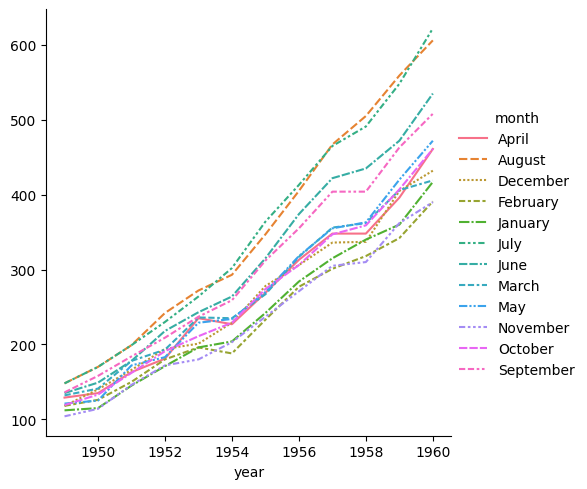

In [20]:
sns.relplot(data=flights_wide,kind='line')

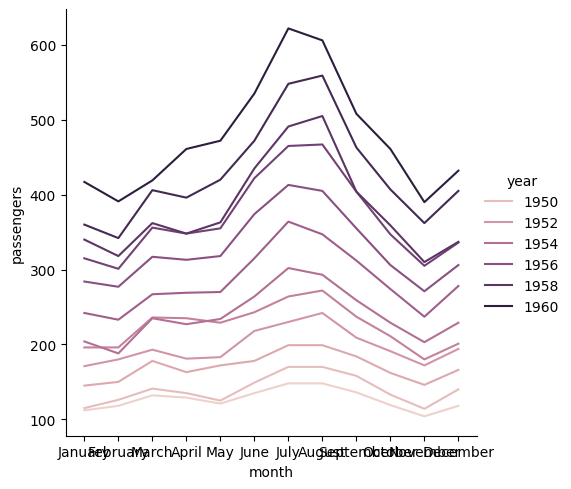

In [21]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

In [23]:
flights_wide.transpose()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


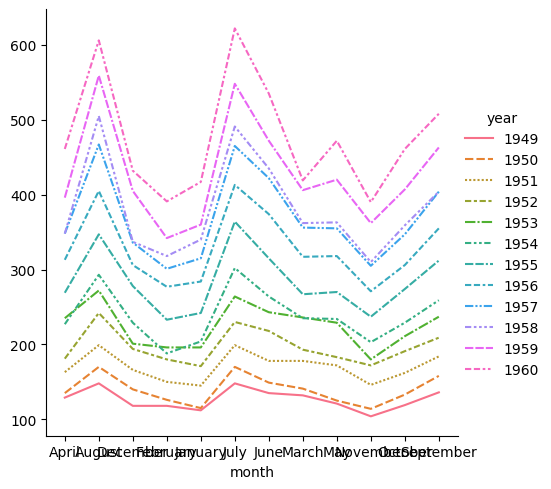

In [22]:
sns.relplot(data=flights_wide.transpose(), kind="line")

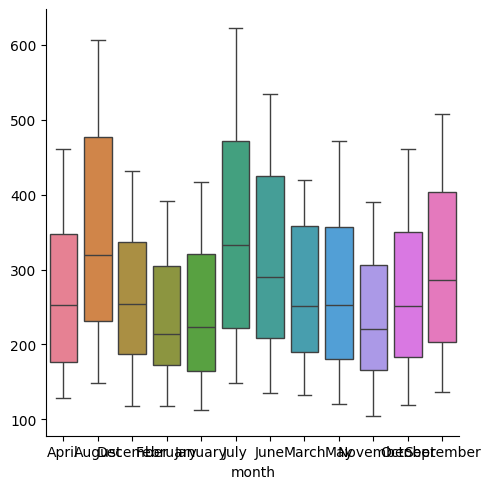

In [24]:
sns.catplot(data=flights_wide,kind='box')